# Проектная работа

# Введение

<b> Название: </b> Анализ рынка заведений общественного питания Москвы.

<b> Краткое описание: </b>  Инвесторы из фонда «Shut Up and Take My Money» решили попробовать себя в новой области и открыть заведение общественного питания в Москве. Заказчики ещё не знают, что это будет за место: кафе, ресторан, пиццерия, паб или бар, — и какими будут расположение, меню и цены. Нам необходимо подготовить исследование рынка Москвы, найти интересные особенности и презентовать полученные результаты, которые в будущем помогут в выборе подходящего инвесторам места. 
 

<b> Цели и задачи: </b> 
 1. Изучить и проверить данные
 2. Проанализировать данные о заведениях общественного питания в Москве
 3. Дать рекомендации заказчикам
 3. Сделать презентацию


<b> Описание исходных данных:</b>  В распоряжении имеется один датасет.

Путь к файлу: /datasets/moscow_places.csv:

<b> Структура датасета:</b>

    name — название заведения;
    address — адрес заведения;
    category — категория заведения, например «кафе», «пиццерия» или «кофейня»;
    hours — информация о днях и часах работы;
    lat — широта географической точки, в которой находится заведение;
    lng — долгота географической точки, в которой находится заведение;
    rating — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);
    price — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее;
    avg_bill — строка, которая хранит среднюю стоимость заказа в виде диапазона
    middle_avg_bill — число с оценкой среднего чека, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Средний счёт»:
    middle_coffee_cup — число с оценкой одной чашки капучино, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Цена одной чашки капучино»:
    chain — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки) (0 - несетевое, 1-сетевое):
    district — административный район, в котором находится заведение, например Центральный административный округ;
    seats — количество посадочных мест.


<b> План (декомпозиция) анализа данных: </b> 

Шаг 1. [Подготовка данных](#section_id)
- Откроем файл
- Изучим общую информацию о датасете
- Проверим наличие пропусков и дубликатов и решим, что с ними делать
- Создадим столбец street с названиями улиц из столбца с адресом.
- Создадим столбец is_24/7 с обозначением, что заведение работает ежедневно и круглосуточно (24/7) или нет

Шаг 2. [Анализ данных](#section_id1)
- Изучим, какие категории заведений представлены в данных
- Исследуем количество объектов общественного питания по категориям: рестораны, кофейни, пиццерии, бары и так далее 
- Проанализируем распределении заведений по категориям и построим визуализацию
- Исследуем количество посадочных мест в местах по категориям: рестораны, кофейни, пиццерии, бары и так далее
- Рассмотрим и изобразим соотношение сетевых и несетевых заведений в датасете
- Построим график, демонстрирующий какие категории заведений чаще являются сетевыми
- Сгруппируем данные по названиям заведений и найдем топ-15 популярных сетей в Москве. Построем подходящую для такой информации визуализацию и сделаем выводы.
- Посмотрим, какие административные районы Москвы присутствуют в датасете
- Отобразим общее количество заведений и количество заведений каждой категории по районам. Попробуем проиллюстрировать эту информацию одним графиком
- Визуализируем распределение средних рейтингов по категориям заведений. Сделаем промежуточные выводы
- Построим фоновую картограмму (хороплет) со средним рейтингом заведений каждого района
- Отобразим все заведения датасета на карте с помощью кластеров средствами библиотеки folium
- Найдём топ-15 улиц по количеству заведений. Построим график распределения количества заведений и их категорий по этим улицам. Попробуем проиллюстрировать эту информацию одним графиком
- Найдем улицы, на которых находится только один объект общепита
- Посчитаем медиану средних чеков заведений для каждого района, которая чаще всего выражена диапазоном. Используем это значение в качестве ценового индикатора района. Постройте фоновую картограмму (хороплет) с полученными значениями для каждого района. 
- Проанализируем цены в центральном административном округе и других. Сделаем вывод о влияние расстояния от центра на цены в заведениях?
- Проиллюстрируем другие взаимосвязи
- Сделаем вывод по этой цели

Шаг 3. [Детализация исследования: открытие кофейни](#section_id2)
- Выясним, сколько всего кофеен в датасете, в каких районах их больше всего, каковы особенности их расположения, есть ли круглосуточные кофейни
- Исследуем рейтинги кофеен и их распределение по районам
- Порекомендуем, на какую стоимость чашки капучино стоит ориентироваться при открытии
- Построим визуализацию 

Шаг 4. [Подготовка презентации](#section_id3)

Шаг 5. [Общие выводы](#section_id4)

<a id='section_id'></a>
## Подготовка данных

In [1]:
#загружаем библиотеки
import pandas as pd
from folium import Map, Choropleth, Marker
from folium.plugins import MarkerCluster
import matplotlib.pyplot as plt
import plotly as py
import plotly.express as px
import plotly.graph_objs as go
import seaborn as sns
import numpy as np
import json

In [2]:
data=pd.read_csv('/datasets/moscow_places.csv')

In [3]:
#исследуем данные
data.head()

name  category                              address  \
0                WoWфли      кафе           Москва, улица Дыбенко, 7/1   
1        Четыре комнаты  ресторан   Москва, улица Дыбенко, 36, корп. 1   
2                 Хазри      кафе       Москва, Клязьминская улица, 15   
3  Dormouse Coffee Shop   кофейня  Москва, улица Маршала Федоренко, 12   
4             Иль Марко  пиццерия      Москва, Правобережная улица, 1Б   

                          district  \
0  Северный административный округ   
1  Северный административный округ   
2  Северный административный округ   
3  Северный административный округ   
4  Северный административный округ   

                                               hours        lat        lng  \
0                             ежедневно, 10:00–22:00  55.878494  37.478860   
1                             ежедневно, 10:00–22:00  55.875801  37.484479   
2  пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...  55.889146  37.525901   
3                             ежедневно, 09:00–22:00  55.881608  37.488860   
4                             ежедневно, 10:00–22:00  55.881166  37.449357   

   rating          price                       avg_bill  middle_avg_bill  \
0     5.0            NaN                            NaN              NaN   
1     4.5  выше среднего       Средний счёт:1500–1600 ₽           1550.0   
2     4.6        средние         Средний счёт:от 1000 ₽           1000.0   
3     5.0            NaN  Цена чашки капучино:155–185 ₽              NaN   
4     5.0        средние         Средний счёт:400–600 ₽            500.0   

   middle_coffee_cup  chain  seats  
0                NaN      0    NaN  
1                NaN      0    4.0  
2                NaN      0   45.0  
3              170.0      0    NaN  
4                NaN      1  148.0

In [4]:
#исследуем данные
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               8406 non-null   object 
 1   category           8406 non-null   object 
 2   address            8406 non-null   object 
 3   district           8406 non-null   object 
 4   hours              7870 non-null   object 
 5   lat                8406 non-null   float64
 6   lng                8406 non-null   float64
 7   rating             8406 non-null   float64
 8   price              3315 non-null   object 
 9   avg_bill           3816 non-null   object 
 10  middle_avg_bill    3149 non-null   float64
 11  middle_coffee_cup  535 non-null    float64
 12  chain              8406 non-null   int64  
 13  seats              4795 non-null   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 919.5+ KB


Пропусков достаточно много в столбцах hours, price, avg_bill, middle_avg_bill, middle_coffee_cup, seats

Столбец seats лучше перевести в тип int

In [5]:
#меняем типы данных
data['seats']=data['seats'].astype('Int64')

Удалять строки с пропусками - не вариант, слишком много данных потеряем

Столбец hours содержит немного пропусков, которые мы не можем заполнить, так как тип данных object. Однако пропуски в этом столбце не помешают нам провести исследование. Поэтому их можно оставить

В столбце price пропусков больше половины. Заполнив их средними или медианными значениями, мы серьезно исказим распределение. Поэтому тоже оставляем. Такая же ситуация со столбцом avg_bill, поэтому и здесь оставляем пропуски

Столбец middle_avg_bill, middle_coffee_cup и seats имеют слишком много пропусков, заполнение их средними значениями, приведет к искажению данных. Поэтому оставляем пропуски. Причем заполнение поля middle_coffee_cup является характерной чертой кофеен, все остальные заведения не воспринимают этот показатель как важный.

Проверим данные на дубликаты; используем связку name, lat, lng. Так как нахождения двух заведений с одинаковыми именами в одной точке невозможно. Адрес может дублироваться, если несколько разных заведений находятся в одном ТЦ. Остальные столбцы также могут повторяться - это не дубликаты

In [6]:
#ищем дубликаты
data[['name','lat','lng']].duplicated().sum()

0

Явные дубликаты отсутствуют.

Теперь необходимо обработать неявные дубликаты в датасете, если мы их обнаружим.

In [7]:
#Посчитаем сколько мы имеем уникальных названий до обработки неявных дубликатов
len(data['name'].unique())

5614

In [8]:
#обработка неявных дубликатов посредством приведения названий заведений в единый формат со змеиным регистом
data['name'] = data['name'].apply(lambda x: x.strip())
data['name'] = data['name'].str.replace(' ', '_').str.replace('-', '_').str.replace('.', '_').str.lower()

/tmp/ipykernel_114/3656212172.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  data['name'] = data['name'].str.replace(' ', '_').str.replace('-', '_').str.replace('.', '_').str.lower()


In [9]:
#Посчитаем сколько мы имеем уникальный названий после обработки неявных дубликатов
len(data['name'].unique())

5493

Таким образом, мы провели унификацию названий заведений, что позволит найти дубликаты

In [10]:
#ищем неявные дубликаты
data[['name', 'lat', 'lng']].duplicated().sum()

1

In [11]:
#посмотрим, что за дубликат
data.loc[data[['name', 'lat', 'lng']].duplicated()]

name  category                                  address  \
1511  more_poke  ресторан  Москва, Волоколамское шоссе, 11, стр. 2   

                             district  \
1511  Северный административный округ   

                                                  hours        lat        lng  \
1511  пн-чт 09:00–18:00; пт,сб 09:00–21:00; вс 09:00...  55.806307  37.497566   

      rating price avg_bill  middle_avg_bill  middle_coffee_cup  chain  seats  
1511     4.2   NaN      NaN              NaN                NaN      1    188

In [12]:
#более подробно изучим заведения с названием 'more_poke'
data[data['name']=='more_poke']

name  category                                  address  \
1430  more_poke  ресторан  Москва, Волоколамское шоссе, 11, стр. 2   
1511  more_poke  ресторан  Москва, Волоколамское шоссе, 11, стр. 2   
6088  more_poke  ресторан           Москва, Духовской переулок, 19   

                             district  \
1430  Северный административный округ   
1511  Северный административный округ   
6088     Южный административный округ   

                                                  hours        lat        lng  \
1430                             ежедневно, 09:00–21:00  55.806307  37.497566   
1511  пн-чт 09:00–18:00; пт,сб 09:00–21:00; вс 09:00...  55.806307  37.497566   
6088                             ежедневно, 10:00–22:00  55.704177  37.612889   

      rating price avg_bill  middle_avg_bill  middle_coffee_cup  chain  seats  
1430     4.2   NaN      NaN              NaN                NaN      0    188  
1511     4.2   NaN      NaN              NaN                NaN      1    188  
6088     4.4   NaN      NaN              NaN                NaN      1   <NA>

Довольно странный дубликат, так как совпадают не все поля. Однако, как мы решили прежде, два заведения с одинаковым названием не могут располагаться на одних и тех же координатах. Дубликат обозначен как несетевое заведение, хотя мы видим, что это сеть ресторанов. Таким образом, это лишь еще больше убеждает нас его удалить, так как данный образец испорчен с точки зрения достоверности информации. То есть нам нужно удалить не 1511 строку, а 1430.

In [13]:
#удаляем дубликат
data = data.drop(index=1430).reset_index(drop=True)

Создадим столбец street c названием улицы из столбца с адресом

In [14]:
data['address']

0                       Москва, улица Дыбенко, 7/1
1               Москва, улица Дыбенко, 36, корп. 1
2                   Москва, Клязьминская улица, 15
3              Москва, улица Маршала Федоренко, 12
4                  Москва, Правобережная улица, 1Б
                           ...                    
8400                 Москва, Профсоюзная улица, 56
8401    Москва, Пролетарский проспект, 19, корп. 1
8402        Москва, Люблинская улица, 112А, стр. 1
8403        Москва, Люблинская улица, 112А, стр. 1
8404                Москва, Россошанский проезд, 6
Name: address, Length: 8405, dtype: object

In [15]:
data['street']=data['address'].agg(lambda x: x.split(',')[1].strip())

In [16]:
#Код ревьюера
data.query('street == "проспект Мира"')

name         category  \
718                 все_лень         ресторан   
786             старое_место             кафе   
792                doner_one             кафе   
800                   пян_се  быстрое питание   
909                   космос             кафе   
...                      ...              ...   
2567             ice_embassy             кафе   
2570  халва,_сеть_почтоматов             кафе   
2571                ресторан         ресторан   
4781            food_embassy         ресторан   
4785               джимми_ли         ресторан   

                                   address  \
718   Москва, проспект Мира, 119, стр. 528   
786   Москва, проспект Мира, 119, стр. 504   
792   Москва, проспект Мира, 119, стр. 596   
800    Москва, проспект Мира, 119, стр. 27   
909    Москва, проспект Мира, 119, стр. 34   
...                                    ...   
2567     Москва, проспект Мира, 26, стр. 2   
2570            Москва, проспект Мира, 146   
2571     Москва, проспект Мира, 62, стр. 1   
4781     Москва, проспект Мира, 26, стр. 2   
4785             Москва, проспект Мира, 12   

                                     district  \
718   Северо-Восточный административный округ   
786   Северо-Восточный административный округ   
792   Северо-Восточный административный округ   
800   Северо-Восточный административный округ   
909   Северо-Восточный административный округ   
...                                       ...   
2567       Центральный административный округ   
2570  Северо-Восточный административный округ   
2571       Центральный административный округ   
4781       Центральный административный округ   
4785       Центральный административный округ   

                                                  hours        lat        lng  \
718   пн-чт 12:00–21:00; пт,сб 12:00–22:00; вс 12:00...  55.836107  37.614875   
786                              ежедневно, 11:00–22:00  55.837212  37.616469   
792                              ежедневно, 11:00–21:00  55.839037  37.613027   
800                              ежедневно, 10:00–20:00  55.834563  37.613549   
909                                   вт-вс 10:45–21:00  55.835060  37.622033   
...                                                 ...        ...        ...   
2567                           ежедневно, круглосуточно  55.777311  37.636400   
2570                                  пн-пт 10:00–19:00  55.820575  37.641970   
2571                                                NaN  55.785618  37.635511   
4781                             ежедневно, 10:00–00:00  55.777224  37.636288   
4785  пн-чт 12:00–23:00; пт,сб 12:00–00:00; вс 12:00...  55.774715  37.632676   

      rating          price                  avg_bill  middle_avg_bill  \
718      4.4  выше среднего    Средний счёт:от 1500 ₽           1500.0   
786      4.1        средние   Средний счёт:900–1100 ₽           1000.0   
792      4.2            NaN                       NaN              NaN   
800      4.4            NaN                       NaN              NaN   
909      3.8            NaN                       NaN              NaN   
...      ...            ...                       ...              ...   
2567     4.4            NaN                       NaN              NaN   
2570     3.6            NaN                       NaN              NaN   
2571     4.3            NaN                       NaN              NaN   
4781     4.5        высокие  Средний счёт:2500–3000 ₽           2750.0   
4785     4.4        высокие  Средний счёт:1000–2500 ₽           1750.0   

      middle_coffee_cup  chain  seats         street  
718                 NaN      0   <NA>  проспект Мира  
786                 NaN      0   <NA>  проспект Мира  
792                 NaN      0   <NA>  проспект Мира  
800                 NaN      1   <NA>  проспект Мира  
909                 NaN      0   <NA>  проспект Мира  
...                 ...    ...    ...            ...  
2567                NaN      0    273  проспек

Для понимания работает ли заведение круглосуточно создадим столбец is_24/7 со значениями True/False

In [17]:
data['is_24/7']=data['hours']==('ежедневно, круглосуточно')

In [18]:
data.head()

name  category                              address  \
0                wowфли      кафе           Москва, улица Дыбенко, 7/1   
1        четыре_комнаты  ресторан   Москва, улица Дыбенко, 36, корп. 1   
2                 хазри      кафе       Москва, Клязьминская улица, 15   
3  dormouse_coffee_shop   кофейня  Москва, улица Маршала Федоренко, 12   
4             иль_марко  пиццерия      Москва, Правобережная улица, 1Б   

                          district  \
0  Северный административный округ   
1  Северный административный округ   
2  Северный административный округ   
3  Северный административный округ   
4  Северный административный округ   

                                               hours        lat        lng  \
0                             ежедневно, 10:00–22:00  55.878494  37.478860   
1                             ежедневно, 10:00–22:00  55.875801  37.484479   
2  пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...  55.889146  37.525901   
3                             ежедневно, 09:00–22:00  55.881608  37.488860   
4                             ежедневно, 10:00–22:00  55.881166  37.449357   

   rating          price                       avg_bill  middle_avg_bill  \
0     5.0            NaN                            NaN              NaN   
1     4.5  выше среднего       Средний счёт:1500–1600 ₽           1550.0   
2     4.6        средние         Средний счёт:от 1000 ₽           1000.0   
3     5.0            NaN  Цена чашки капучино:155–185 ₽              NaN   
4     5.0        средние         Средний счёт:400–600 ₽            500.0   

   middle_coffee_cup  chain  seats                   street  is_24/7  
0                NaN      0   <NA>            улица Дыбенко    False  
1                NaN      0      4            улица Дыбенко    False  
2                NaN      0     45       Клязьминская улица    False  
3              170.0      0   <NA>  улица Маршала Федоренко    False  
4                NaN      1    148      Правобережная улица    False

<b> Микровывод: </b>
    Была проведена предобработка данных, включающая работу с пропусками, поиск явных и неявных дубликатов и их удаление, приведение стобцов в удобный формат, создание новых столбцов street и is 24/7

<a id='section_id1'></a>
## Анализ данных

Выясним, какие категории заведений представлены в данных

In [19]:
data['category'].unique()

array(['кафе', 'ресторан', 'кофейня', 'пиццерия', 'бар,паб',
       'быстрое питание', 'булочная', 'столовая'], dtype=object)

Исследуем количество объектов общественного питания по категориям

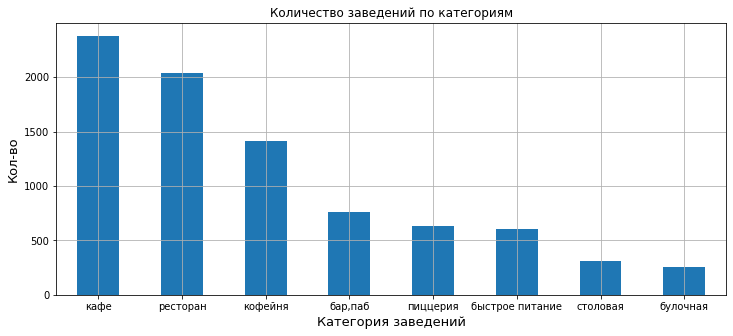

In [20]:
#построим график распределения кол-во заведений по категориям
plt.figure(figsize=(12,5))
data['category'].value_counts().plot(kind='bar', grid=True);
plt.title('Количество заведений по категориям');
plt.xticks(rotation=0);
plt.xlabel('Категория заведений', fontsize=13);
plt.ylabel('Кол-во', fontsize=13);

Как мы видим, кафе - наиболее распространенный тип заведений в Москве. Также в топ-3 по количеству входят рестораны и кофейни. Существенно меньше булочных и столовых

Исследуем количество посадочных мест в местах по категориям: рестораны, кофейни, пиццерии, бары и так далее

Сначала построим барплот среднего кол-ва посадочных мест по категориям, на втором графике изобразим распределение всех посадочных мест по категориям.

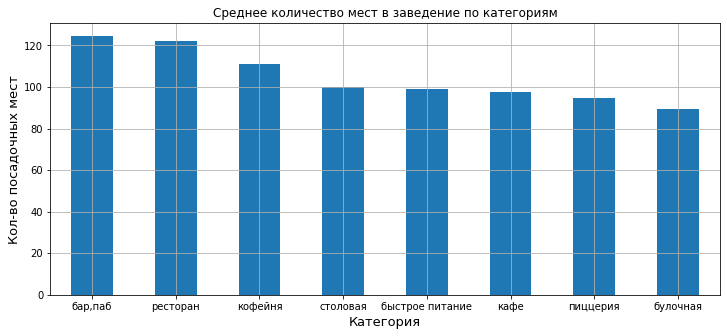

In [21]:
plt.figure(figsize=(12,5))
data.groupby('category')['seats'].mean().sort_values(ascending=False).plot(kind='bar', grid=True)
plt.title('Среднее количество мест в заведение по категориям');
plt.xticks(rotation=0);
plt.xlabel('Категория', fontsize=13);
plt.ylabel('Кол-во посадочных мест', fontsize=13);

В среднем кол-во посадочных мест на заведение не имеет огромного размаха. Во всех категориях от 85 до 125 мест в заведение. Наибольшее среднее кол-во мест на заведение приходится на бары/пабы, рестораны и кофейни. Наименьшие - на булочные и пицеерии, что вполне ожидаемо.

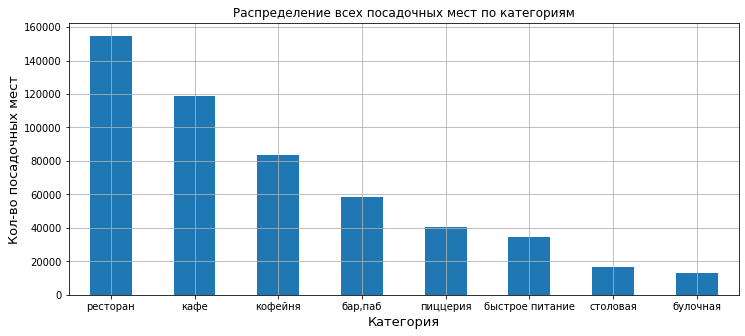

In [22]:
#построим график распределения всех посадочных мест по категориям
plt.figure(figsize=(12,5))
data.groupby('category')['seats'].sum().sort_values(ascending=False).plot(kind='bar', grid=True)
plt.title('Распределение всех посадочных мест по категориям');
plt.xlabel('Категория', fontsize=13);
plt.ylabel('Кол-во посадочных мест', fontsize=13)
plt.xticks(rotation=0);

Наибольшее кол-во посадочных мест в городе у ресторанов, кафе и кофеен.

Рассмотрим и изобразим соотношение сетевых и несетевых заведений в датасете

In [23]:
fig = go.Figure()
values=[data['chain'].sum(), data.query('chain==0')['chain'].count()]
labels=['сетевые заведения', 'несетевые заведения']
fig.add_trace(go.Pie(values=values, labels=labels))
fig.update_layout(title='Соотношение сетевых и несетевых заведений')
fig.show()

Как видим на графике несетевых заведений значительно больше. Они составляет приблизительно 62% от всех заведений, представленных в датасете

Построим график, демонстрирующий какие категории заведений чаще являются сетевыми

In [24]:
data.query('chain==1')['category'].value_counts()

кафе               779
ресторан           730
кофейня            720
пиццерия           330
быстрое питание    232
бар,паб            169
булочная           157
столовая            88
Name: category, dtype: int64

In [25]:
#строим круговую диаграмму
fig = go.Figure()
labels=data.query('chain==1')['category'].value_counts().index
values=data.query('chain==1')['category'].value_counts().values
colors=['#104E8B','#1874CD','#1C86EE','#6495ED']
fig.add_trace(go.Pie(values=values, labels=labels))
fig.update_layout(title='Соотношение категорий заведений, являющихся сетевыми',
                 colorway=colors)
fig.show()

По графику видно, что кафе, рестораны и кофейни являются наиболее распространенными категориями сетевых заведений. 
Среди сетевых заведений наименьшую часть представляют столовые и булочные.

Какие категории заведений чаще являются сетевыми? Исследуйте данные и ответьте на вопрос графиком.

In [26]:
chain_ratio_category=data.groupby('category').agg({'chain':'sum', 'name':'count'})
chain_ratio_category.rename(columns={'chain':'chain_count', 'name':'common_count'}, inplace=True)
sorted_chain_ratio=chain_ratio_category.sort_values(by='common_count')

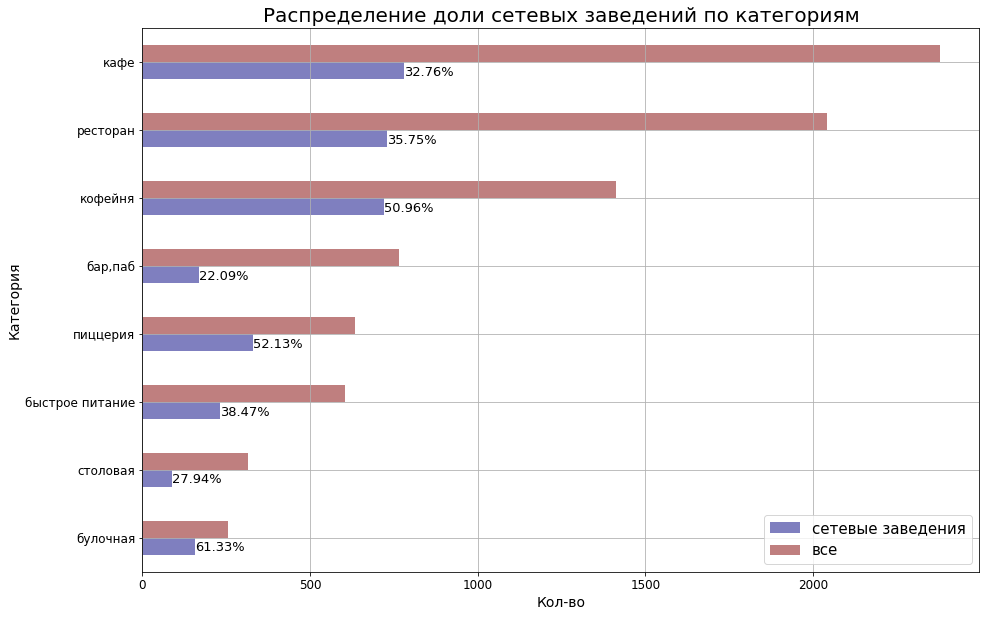

In [27]:
chain_ratio_category.sort_values(by='common_count').plot(kind='barh', style='darkgrid', \
            cmap='jet', figsize=(15,10), fontsize=12, alpha=0.5);
for i,j in enumerate(chain_ratio_category.sort_values(by='common_count')['chain_count']):
    plt.annotate(f"{round((sorted_chain_ratio['chain_count'].iloc[i]/sorted_chain_ratio['common_count'].iloc[i])*100, 2)}%", (j, i-0.2), fontsize=13)
plt.legend(['сетевые заведения', 'все'], fontsize=15)
plt.xlabel('Кол-во', fontsize=14)
plt.ylabel('Категория', fontsize=14)
plt.title('Распределение доли сетевых заведений по категориям', fontsize=20)
plt.grid()
plt.show()

<b> Топ 3 наиболее сетевизированных категории заведений: </b>
1. Булочные (61%)
2. Пиццерии (52%)
3. Кофейни (51%)

Более половины заведений из этих категорий являются сетевыми

Далее сгруппируем данные по названиям заведений и найдем топ-15 популярных сетей в Москве. Построем подходящую для такой информации визуализацию и сделаем выводы.

In [28]:
top_15_chains=data.query('chain==1').pivot_table(columns='category', index='name', values='address',\
    aggfunc='count', margins=True).sort_values(by='All', ascending=False)[1:].head(15)

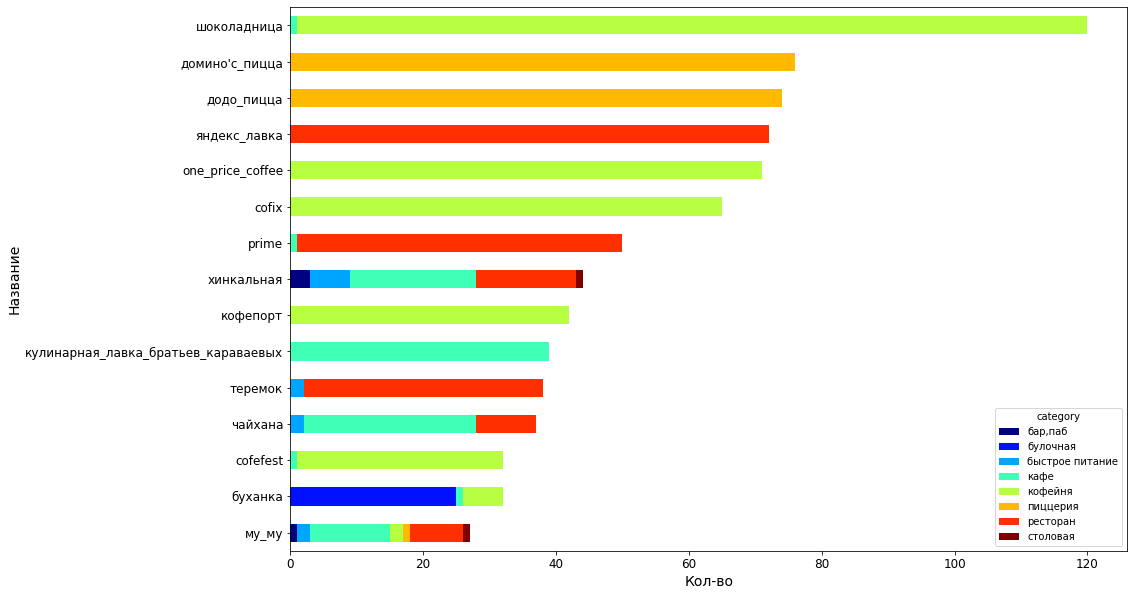

In [29]:
#строим горизонтальный барплот
top_15_chains.sort_values(by='All').drop(columns='All').plot(kind='barh', stacked=True, style='darkgrid', \
            cmap='jet', figsize=(15,10), fontsize=12);
plt.ylabel('Название', fontsize=14)
plt.xlabel('Кол-во', fontsize=14)
plt.show();

Судя по таблице, некоторые сети имеют заведения разных категорий, но чаще всего сетевые заведения представлены ресторанами, кофейнями, кафе, быстрым питанием и пиццериями

Посмотрим, какие административные районы Москвы присутствуют в датасете

In [30]:
data['district'].unique()

array(['Северный административный округ',
       'Северо-Восточный административный округ',
       'Северо-Западный административный округ',
       'Западный административный округ',
       'Центральный административный округ',
       'Восточный административный округ',
       'Юго-Восточный административный округ',
       'Южный административный округ',
       'Юго-Западный административный округ'], dtype=object)

В датасете присутствует 9 адм.округов Москвы из 12

Отобразим общее количество заведений и количество заведений каждой категории по районам. Попробуем проиллюстрировать эту информацию одним графиком

In [31]:
data.groupby('category')['category'].count().sort_values(ascending=False)

category
кафе               2378
ресторан           2042
кофейня            1413
бар,паб             765
пиццерия            633
быстрое питание     603
столовая            315
булочная            256
Name: category, dtype: int64

In [32]:
rayon_category=data.pivot_table(index='district', columns='category', values='address', aggfunc='count',\
    margins=True).sort_values(by='All').drop('All', axis=1).drop('All', axis=0)

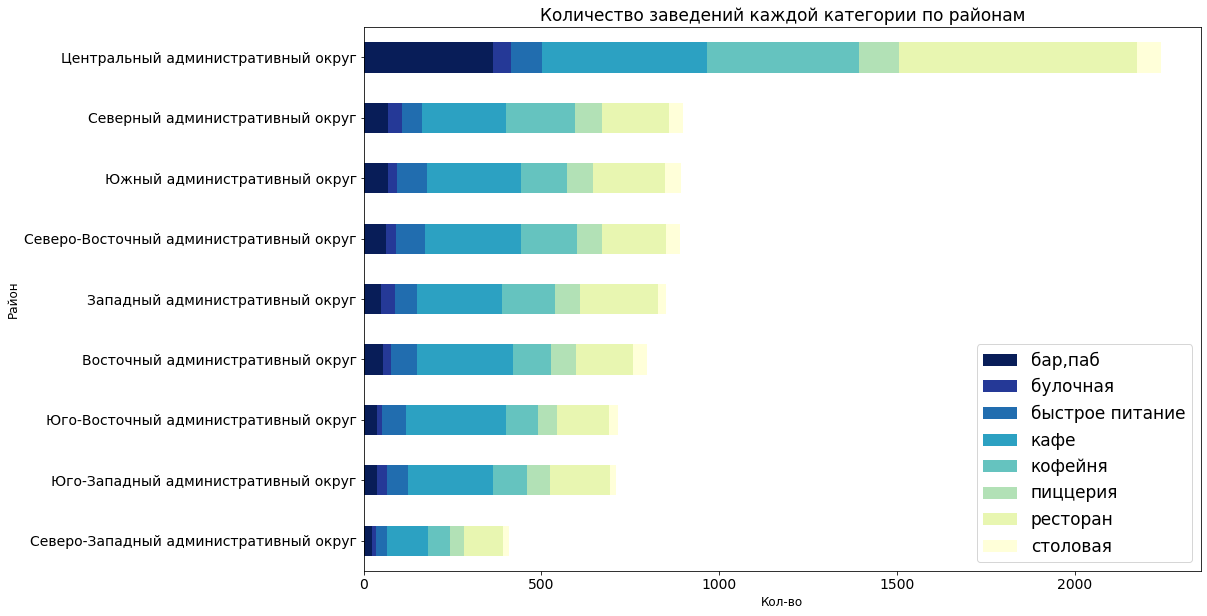

In [33]:
#строим горизонтальный барплот
rayon_category.plot(kind='barh', stacked=True, cmap='YlGnBu_r', figsize=(15,10), fontsize=14);
plt.ylabel('Район', fontsize=12)
plt.xlabel('Кол-во', fontsize=12)
plt.legend(fontsize=17)
plt.title('Количество заведений каждой категории по районам',fontsize=17);

Большинство заведений расположено в Центральном административном районе.

Визуализируем распределение средних рейтингов по категориям заведений

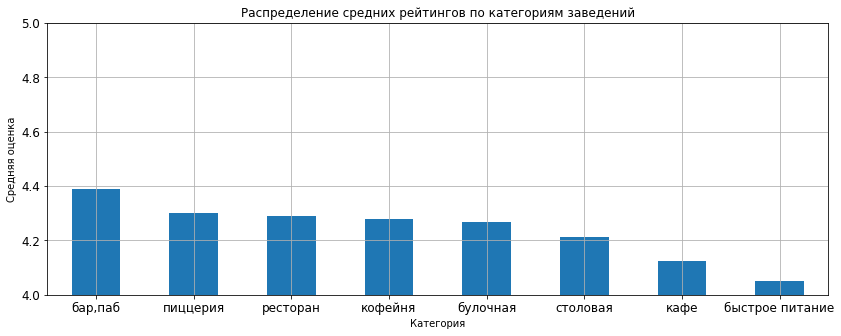

In [34]:
#строим график распределения средних рейтингов по категориям
plt.figure(figsize=(14,5))
data.groupby('category')['rating'].mean().sort_values(ascending=False).plot(kind='bar', grid=True, fontsize=12)
plt.ylim(4,5)
plt.xticks(rotation=0)
plt.xlabel('Категория')
plt.ylabel('Средняя оценка')
plt.title('Распределение средних рейтингов по категориям заведений', fontsize=12);

Как мы видим, все категории получают среднюю оценку выше 4 и ниже 4.4. Поэтому в абсолютном масштабе серьезных отличий нет. Однако относительные различия имеются. Так рестораны быстрого питания в среднем имеют оценку ниже всех остальных типов заведений. А бары, пабы обладают высшей оценкой среди всех остальных категорий.

Построим фоновую картограмму (хороплет) со средним рейтингом заведений каждого района.

In [35]:
state_geo = '/datasets/admin_level_geomap.geojson'
moscow_lat, moscow_lng = 55.751244, 37.618423
m=Map(location=[moscow_lat, moscow_lng], zoom_start=10)
Choropleth(
    geo_data=state_geo,
    data=data.groupby('district')['rating'].mean(),
    columns=['district','rating'],
    key_on='feature.name',
    fill_color='Purples',
    fill_opacity=0.4,
    legend_name='Медианный рейтинг заведений по районам',
).add_to(m)
m

По карте видно, что Центральный административный округ превосходит по рейтингу остальные.

Отобразим все заведения датасета на карте с помощью кластеров средствами библиотеки folium.

In [36]:
#строим хороплёт с кластерами
moscow_lat, moscow_lng = 55.751244, 37.618423

m = Map(location=[moscow_lat, moscow_lng], zoom_start=10)

marker_cluster = MarkerCluster().add_to(m)

def create_clusters(row):
    Marker(
        [row['lat'], row['lng']],
        popup=f"{row['name']} {row['rating']}",
    ).add_to(marker_cluster)

data.apply(create_clusters, axis=1)

m

Заметим, что по мере приближения к центру Москвы кол-во заведений (плотность) растёт

Найдем топ-15 улиц по количеству заведений. Построим график распределения количества заведений и их категорий по этим улицам.

In [ ]:
super_streets=data.pivot_table(index='street', columns='category', values='name', aggfunc='count',\
    margins=True).sort_values(by='All', ascending=False).drop('All').head(15)

In [ ]:
super_streets.sort_values(by='All').drop('All', axis=1).plot(kind='barh', stacked=True, figsize=(12,10),\
        grid=True, fontsize=13, cmap='tab20b');
plt.title('Распределение кол-ва заведений по улицам', fontsize=20);
plt.ylabel('Улица',fontsize=14);
plt.xlabel('Кол-во',fontsize=14);

По графику видно, что наиболее сильно представлены на этих улицах кафе, кофейни и рестораны.

Нельзя утверждать, что определенные категории концентрируются на отдельных улицах, а другие игнорируют, хоть в некоторых примерах мы видим серьезные перекосы, например, на МКАДе кафе составляют абсолютное большинство.

На проспекте Мира, как одной из самых длинных улиц Москвы, находится наибольшее кол-во заведений (около 200).

Также график не дает оснований для предположения о какой-либо серьезной взаимосвязи улицы с категорией заведения.

Найдем улицы, на которых находится только один объект общепита

In [ ]:
#создадим отдельную переменную для улиц с одним объектом общепита
nesuper_streets=data.pivot_table(index='street', columns='category', values='name', aggfunc='count',\
    margins=True).query('All==1')

In [ ]:
nesuper_streets.head()

In [ ]:
#группируем данные и находим средний чек для каждого района
data.groupby('district')['middle_avg_bill'].median().sort_values(ascending=False)

Построим фоновую картограмму (хороплет) со средними чеками для каждого района. Проанализируем цены в центральном административном округе и других. Выясним, как удалённость от центра влияет на цены в заведениях.

In [ ]:
state_geo = '/datasets/admin_level_geomap.geojson'
moscow_lat, moscow_lng = 55.751244, 37.618423
m=Map(location=[moscow_lat, moscow_lng], zoom_start=10)
Choropleth(
    geo_data=state_geo,
    data=data.groupby('district')['middle_avg_bill'].median(),
    columns=['district','middle_avg_bill'],
    key_on='feature.name',
    fill_color='BuGn',
    fill_opacity=0.4,
    legend_name='Медианный чек заведений по районам',
).add_to(m)
m

По карте видно, что наибольшие средние чеки в Центральном и Западном адимнистративных округах. В некоторых округах цены вполовину ниже, чем в центре.

Еще было бы любопытно посмотреть распределение средних чеков по категориям

In [ ]:
#строим график распределения средний чеков по категориям
data.groupby('category')['middle_avg_bill'].mean().sort_values(ascending=False).plot(kind='bar', grid=True, \
    fontsize=12, figsize=(15,7));
plt.xticks(rotation=0);
plt.xlabel('Категория', fontsize=13);
plt.ylabel('Сумма', fontsize=13)
plt.title('Средний чек каждой категории заведений', fontsize=15);

Неоспоримыми лидерами по седнему чеку являются рестораны, пабы и бары

<b>Промежуточные выводы: </b>  
1. Кафе и рестораны - самые распространенные категории заведений в Москве. Булочные и столовые не особо популярны в Москве.
2. Бары, пабы, рестораны и кофейни имеют наибольшее среднее кол-во мест на одно заведение
3. Несетевые заведения в Москве превалируют. Их 62%
4. Сетевыми заведениями чаще всего являются кафе, рестораны и кофейни
5. Однако в топ-3 сети входят 2 пиццерии
6. В Центральном Административном округе больше всего заведений, что говорит о двух вещах: а)о высоком спросе, б) о высокой конкуренции
7. Также в ЦАО средняя оценка выше чем в остальных районах, что также свидетельствует о качестве расположенных там заведений. То есть с ними будет сложнее конкурировать, в случае расположения нашего заведения в данном округе.
8. Бары и пабы имеют наивысшую оценку среди остальных категорий. Они вторые в рейтинге среднего чека. При этом баров и пабов в Москве не так уж и много. Поэтому предварительная рекомендация - ориентироваться на открытие паба или бара
9. Из той небольшой выборки средних чеков, мы делаем вывод, что Западный и Центральный округа имеют наивысший средний чек среди других округов. Однако, по медианному рейтингу заведений и по кол-ву заведений Западный округ значительно уступает Центральному, из чего делаем вывод о низком уровне конкуренции, что является несомненным преимуществом Западного Административного округа

Таким образом, предварительно стоит задуматься об открытие паба или бара в ЗАО.

<a id='section_id2'></a>
## Детализация исследования: открытие кофейни

Выясним, сколько всего кофеен в датасете, и в каких районах их больше всего, каковы особенности их расположения.

In [ ]:
data.query('category=="кофейня"')['name'].count()

In [ ]:
#построим график распредления кол-ва кофеен по районам
data.query('category=="кофейня"').groupby('district')['name'].count().sort_values().plot(kind='barh', fontsize=12,\
    figsize=(12,7));
plt.title('Распределение кофеен по округам', fontsize=15);
plt.ylabel('Район');
plt.xlabel('Кол-во');

Топ-3 района по кол-ву кофеен: Центральный, Северный и Северо-Восточный округа

Создадим карту с кластерами кофеен, с помощью которой мы сможем выявить особенности расположения кофеен

In [ ]:
moscow_lat, moscow_lng = 55.751244, 37.618423

m = Map(location=[moscow_lat, moscow_lng], zoom_start=10)

marker_cluster = MarkerCluster().add_to(m)

def create_clusters(row):
    Marker(
        [row['lat'], row['lng']],
        popup=f"{row['name']} {row['rating']}",
    ).add_to(marker_cluster)

data.query('category=="кофейня"').apply(create_clusters, axis=1)

m

По карте мы видим, что кол-во кофеен резко растет при приближению к центру города и убывает при удалению от него.

Выясним, есть ли круглосуточные кофейни

In [ ]:
data.query('category=="кофейня" and hours=="ежедневно, круглосуточно"')['name'].count()

В Москве 59 круглосуточных кофеен

Выясним, какие у кофеен рейтинги и как они распределяются по районам

In [ ]:
#вычисляем средний рейтинг кофеен
data.query('category=="кофейня"')['rating'].mean()

In [ ]:
#строим гистограмму рейтинга кофеен
data.query('category=="кофейня"')['rating'].hist(figsize=(14,7));
plt.axvline(x=data.query('category=="кофейня"')['rating'].mean(), linestyle='--', color='r', \
            label='Средний рейтинг кофеен');
plt.legend(fontsize=14);
plt.title('Распределение рейтинга кофеен', fontsize=20);
plt.xlabel('Средний рейтинг', fontsize=13);
plt.ylabel('Кол-во кофеен', fontsize=13);

Средний рейтинг кофеен по Москве - 4.28. Около 90% кофеен имеют рейтинг выше 4.

In [ ]:
#строим хороплет, отображающий средний рейтинг кофеен в каждом районе/
state_geo = '/datasets/admin_level_geomap.geojson'
moscow_lat, moscow_lng = 55.751244, 37.618423
m=Map(location=[moscow_lat, moscow_lng], zoom_start=10)
Choropleth(
    geo_data=state_geo,
    data=data.query('category=="кофейня"').groupby('district')['rating'].mean(),
    columns=['district','rating'],
    key_on='feature.name',
    fill_color='YlOrRd',
    fill_opacity=0.4,
    legend_name='Средний рейтинг кофеен по районам',
).add_to(m)
m

По хороплету видно, что рейтинги кофеен в Центральном, Северном и Северо-Заданом районах выше, чем в остальной Москве. Следовательно, конкуренция в этих районах довольно серьезная

Выясним, на какую стоимость чашки капучино стоит ориентироваться при открытии и почему

In [ ]:
data.query('category=="кофейня"')['middle_coffee_cup'].median()

In [ ]:
#построим гистограмму стоимости одной кружки кофе
data.query('category=="кофейня"')['middle_coffee_cup'].hist(figsize=(12,7));
plt.axvline(x=data.query('category=="кофейня"')['middle_coffee_cup'].median(), linestyle='--', color='r', \
            label='Медианная стоимость чашки кофе');
plt.axvline(x=data.query('category=="кофейня"')['middle_coffee_cup'].mean(), linestyle='--', color='y', \
            label='Средняя стоимость чашки кофе');
plt.legend(fontsize=14);
plt.title('Распределение стоимости одной кружки кофе', fontsize=15);
plt.ylabel('Кол-во кофеен', fontsize=13);
plt.xlabel('Средняя стоимость чашки кофе', fontsize=13);

Стоит ориентироваться на медианную стоимость чашки капуччино - 170, так как распределение имеет сильный выброс. Хотя как мы видим по гистограмме, средняя не далеко отошла от медианы

Заметим, что 1-2 заведения перекашивает меианную стоимость чашки капуччино. Интересно узнать что это за выбросы и где они располагаются

In [ ]:
#найдем выброс, чтобы знать, где располагается это заведение
data.query('category=="кофейня" and middle_coffee_cup>1400')

Также было бы интересно узнать распределение средней цены за чашку кофе территориально

In [ ]:
data.query('category=="кофейня"').groupby('district')['middle_coffee_cup'].median().sort_values(ascending=False)

In [ ]:
#построим хороплёт, показывающий медианную стоимость чашки кофе в кажом районе
state_geo = '/datasets/admin_level_geomap.geojson'
moscow_lat, moscow_lng = 55.751244, 37.618423
m=Map(location=[moscow_lat, moscow_lng], zoom_start=10)
Choropleth(
    geo_data=state_geo,
    data=data.query('category=="кофейня"').groupby('district')['middle_coffee_cup'].median(),
    columns=['district','rating'],
    key_on='feature.name',
    fill_color='YlOrRd',
    fill_opacity=0.4,
    legend_name='Медианная цена чашки кофе по районам',
).add_to(m)
m

Рассчитываем медиану, так как знаем что в Восточном административном округе располагается серьезный выброс - Шоколадница с средней ценой в 1568.

In [ ]:
#посмотрим сколько вообще кофеен имеет заполненное поле middle_coffee_cup
data.query('category=="кофейня"')['middle_coffee_cup'].count()

Учитываем, что всего 521 кофейня из 1413 предоставляют отчет о стоимости средней чашки кофе. Поэтому реальное распределение средней цены по районам может быть немного другим.

Видим, что наиболее высокие цены за кружку кофе в ЦАО, Западном округе и Юго-Западном округах.

<b> Рекомендации: </b>

Исходя из проведенного выше анализа логично следуют рекомендация открыть кофейню в Западном районе Москвы, так как:

1) в данном районе сравнительно немного кофеен (около 150)

2) рейтинг местных кофеен ниже среднего по Москве (около 4.2).

То есть эти два пункта свидетельствует о сравнительно низком пороге входа и слабой конкурентной среде, что является гарантией, что наша кофейня не разориться на первых этапах.

3) Мы видим, что медианная стоимость чашки кофе в Западном округе выше средней стоимости по Москве. Это позволит нашей кофейни продавать кофе по цене выше среднемосковской и не бояться, что клиент уйдет в соседнюю кофейню. Данное преимущество даст возможность получать прибыль, которая бы была скорее всего меньше в других округах.

4) Насчет цены чашки кофе рекомендуется установить цену на уровне 185. Так мы получим конкурентное преимущество перед соседними кофейнями и все же сохраним цену выше среднемосковском (170).


<a id='section_id3'></a>
## Презентация

https://disk.yandex.ru/i/9MuZsC4WTJ6Uvw

<a id='section_id4'></a>
# Вывод:


В ходе исследования была проведена предобработка данных, включающая работу с пропусками, поиск дубликатов, приведение стобцов в удобный формат, создание новых столбцов street и is 24/7.

В ходе исследования были сделаны следующие выводы:
- Кафе, рестораны и кофейни – самые распространенные типы заведений общественного питания
- Наибольшие средние кол-ва мест на заведение приходится на бары/пабы, рестораны и кофейни
- Несетевых заведений в Москве больше чем сетевых (62% к 38%)
- Сетевыми заведениями чаще всего являются кафе, рестораны и кофейни
- Высокий уровень конкуренции в ЦАО Москвы
- Западный и Центральный округа имеют наивысший средний чек среди других округов
- Бары и пабы имеют наивысшую оценку среди остальных категорий. Они вторые в рейтинге среднего чека. При этом баров и пабов в Москве немного. Поэтому открытие такого заведения довольно выгодно.

Для открытия кофейни были выработаны следующие рекомендации:
- открыть кофейню в Западном административном округе Москвы
- Установить среднюю цену чашки кофе на уровне 185
